In [1]:
import torch
from torch import nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from torch.utils.data import DataLoader
from Models import *
from helpers import *
from math import ceil
import matplotlib.pyplot as plt

In [2]:
# You can get the data from https://www.kaggle.com/puneet6060/intel-image-classification
train_dir = "../Data/seg_train/"
test_dir = "../Data/seg_train/"
valid_dir = "../Data/seg_pred/"

In [3]:
transform = torchvision.transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5), # randomly flip and rotate
    transforms.ColorJitter(0.3,0.4,0.4,0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.425, 0.415, 0.405), (0.205, 0.205, 0.205))
    ])

# Augmentation on test images not needed
transform_tests = torchvision.transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.425, 0.415, 0.405), (0.255, 0.245, 0.235))
    ])

In [4]:
train_images, train_labels, train_label_decoder = get_images(train_dir)
test_images, test_labels, test_label_decoder = get_images(test_dir)
print(train_images.shape)

for i in range(6):
    assert train_label_decoder[i] == test_label_decoder[i]



train_data = ImageDataset(train_images, train_labels, transform=transform)
test_data = ImageDataset(test_images, test_labels, transform=transform_tests)

(14034, 150, 150, 3)


In [5]:
sample = train_data[0]
print(sample[0].shape)
print(sample[1])

torch.Size([3, 150, 150])
tensor(0)


In [6]:
model = ResnetTrained(train_resnet = True, pretrained=False)

In [7]:
batch_size=8
total_samples = len(train_data)
test_samples = len(test_data)
n_iterations = ceil(total_samples / batch_size)
learning_rate = 1e-3
num_epochs = 80
save_Dir = "../Models/"
vol = 4

train_loader = DataLoader(train_data,batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
print(device)

cuda


In [8]:
trained_model, losses, accuracies = fit(model, optimizer, train_loader, test_loader, criterion, num_epochs, device, n_iterations, save_Dir, vol=vol)

Epoch 1, iteration 0, loss 1.7128022909164429
Epoch 1, iteration 200, loss 1.6483718156814575
Epoch 1, iteration 400, loss 1.5186982154846191
Epoch 1, iteration 600, loss 1.161478042602539
Epoch 1, iteration 800, loss 1.5223408937454224
Epoch 1, iteration 1000, loss 1.0517964363098145
Epoch 1, iteration 1200, loss 1.5515552759170532
Epoch 1, iteration 1400, loss 1.6349611282348633
Epoch 1, iteration 1600, loss 1.6848281621932983
Epoch 2, loss: 1.4484312534332275, accuracy 40.280746757873736
Epoch 2, iteration 0, loss 1.0488035678863525
Epoch 2, iteration 200, loss 2.033801317214966
Epoch 2, iteration 400, loss 1.5869107246398926
Epoch 2, iteration 600, loss 1.7770636081695557
Epoch 2, iteration 800, loss 1.3646612167358398
Epoch 2, iteration 1000, loss 1.4098716974258423
Epoch 2, iteration 1200, loss 1.1804001331329346
Epoch 2, iteration 1400, loss 1.2899599075317383
Epoch 2, iteration 1600, loss 1.4500566720962524
Epoch 3, loss: 1.6844611167907715, accuracy 34.49479834687188
Epoch 3, 

Epoch 17, iteration 1000, loss 0.7048323154449463
Epoch 17, iteration 1200, loss 1.0725126266479492
Epoch 17, iteration 1400, loss 0.67765212059021
Epoch 17, iteration 1600, loss 1.7228186130523682
Epoch 18, loss: 3.5666487216949463, accuracy 77.8181559070828
Epoch 18, iteration 0, loss 0.4328455328941345
Epoch 18, iteration 200, loss 1.259771466255188
Epoch 18, iteration 400, loss 0.33956217765808105
Epoch 18, iteration 600, loss 0.8445342183113098
Epoch 18, iteration 800, loss 0.6283143162727356
Epoch 18, iteration 1000, loss 0.6852893829345703
Epoch 18, iteration 1200, loss 1.1479554176330566
Epoch 18, iteration 1400, loss 1.4264808893203735
Epoch 18, iteration 1600, loss 0.6744024157524109
Epoch 19, loss: 1.1787701845169067, accuracy 76.8205785948411
Epoch 19, iteration 0, loss 0.2949470281600952
Epoch 19, iteration 200, loss 0.28058335185050964
Epoch 19, iteration 400, loss 1.1693781614303589
Epoch 19, iteration 600, loss 0.5100911855697632
Epoch 19, iteration 800, loss 0.58249723

Epoch 32, iteration 1400, loss 1.0373458862304688
Epoch 32, iteration 1600, loss 0.9566500186920166
Epoch 33, loss: 0.2816757261753082, accuracy 85.57075673364686
Epoch 33, iteration 0, loss 0.32679519057273865
Epoch 33, iteration 200, loss 0.12730242311954498
Epoch 33, iteration 400, loss 0.5872623324394226
Epoch 33, iteration 600, loss 0.9162114858627319
Epoch 33, iteration 800, loss 1.0126347541809082
Epoch 33, iteration 1000, loss 0.5872418880462646
Epoch 33, iteration 1200, loss 0.13968119025230408
Epoch 33, iteration 1400, loss 0.6897371411323547
Epoch 33, iteration 1600, loss 0.8644655346870422
Epoch 34, loss: 0.2856971025466919, accuracy 85.57075673364686
Epoch 34, iteration 0, loss 0.19405347108840942
Epoch 34, iteration 200, loss 0.5431959629058838
Epoch 34, iteration 400, loss 1.1306124925613403
Epoch 34, iteration 600, loss 0.19320997595787048
Epoch 34, iteration 800, loss 0.9710213541984558
Epoch 34, iteration 1000, loss 0.17429544031620026
Epoch 34, iteration 1200, loss 0

Epoch 48, iteration 400, loss 0.31513306498527527
Epoch 48, iteration 600, loss 0.15028725564479828
Epoch 48, iteration 800, loss 0.15560974180698395
Epoch 48, iteration 1000, loss 1.2837971448898315
Epoch 48, iteration 1200, loss 0.3876453936100006
Epoch 48, iteration 1400, loss 0.4139687120914459
Epoch 48, iteration 1600, loss 0.4545031487941742
Epoch 49, loss: 1.6811325550079346, accuracy 90.0384779820436
90.0384779820436 is higher than the max 89.3829271768562
Epoch 49, iteration 0, loss 0.024707889184355736
Epoch 49, iteration 200, loss 0.06274963170289993
Epoch 49, iteration 400, loss 0.44374918937683105
Epoch 49, iteration 600, loss 0.7737992405891418
Epoch 49, iteration 800, loss 0.12024915218353271
Epoch 49, iteration 1000, loss 0.5389954447746277
Epoch 49, iteration 1200, loss 0.04354255646467209
Epoch 49, iteration 1400, loss 0.3778877854347229
Epoch 49, iteration 1600, loss 0.3131488859653473
Epoch 50, loss: 0.38095182180404663, accuracy 89.96722245974063
Epoch 50, iteratio

Epoch 63, iteration 600, loss 0.0804814025759697
Epoch 63, iteration 800, loss 0.04257136955857277
Epoch 63, iteration 1000, loss 0.3064226806163788
Epoch 63, iteration 1200, loss 0.45269012451171875
Epoch 63, iteration 1400, loss 0.04646231234073639
Epoch 63, iteration 1600, loss 0.21263493597507477
Epoch 64, loss: 0.01711520366370678, accuracy 92.54667236710846
Epoch 64, iteration 0, loss 0.09252172708511353
Epoch 64, iteration 200, loss 0.06437600404024124
Epoch 64, iteration 400, loss 0.2174304723739624
Epoch 64, iteration 600, loss 0.08805572241544724
Epoch 64, iteration 800, loss 0.03978949785232544
Epoch 64, iteration 1000, loss 0.18935197591781616
Epoch 64, iteration 1200, loss 0.03882000967860222
Epoch 64, iteration 1400, loss 0.22902922332286835
Epoch 64, iteration 1600, loss 0.5183570981025696
Epoch 65, loss: 2.082876682281494, accuracy 93.0454610232293
93.0454610232293 is higher than the max 92.62505344164173
Epoch 65, iteration 0, loss 0.1253289133310318
Epoch 65, iteratio

Epoch 78, iteration 1400, loss 0.039071448147296906
Epoch 78, iteration 1600, loss 0.007114664185792208
Epoch 79, loss: 0.003213057294487953, accuracy 95.0121134387915
Epoch 79, iteration 0, loss 0.2772535979747772
Epoch 79, iteration 200, loss 0.39685729146003723
Epoch 79, iteration 400, loss 0.6350274682044983
Epoch 79, iteration 600, loss 0.07513491064310074
Epoch 79, iteration 800, loss 0.020956410095095634
Epoch 79, iteration 1000, loss 0.07537876814603806
Epoch 79, iteration 1200, loss 0.24685895442962646
Epoch 79, iteration 1400, loss 0.008896549232304096
Epoch 79, iteration 1600, loss 0.3087056577205658
Epoch 80, loss: 0.0034394366666674614, accuracy 95.79592418412427
95.79592418412427 is higher than the max 95.43964657260938
Epoch 80, iteration 0, loss 0.3566513657569885
Epoch 80, iteration 200, loss 0.021536268293857574
Epoch 80, iteration 400, loss 0.09673599153757095
Epoch 80, iteration 600, loss 0.8880664706230164
Epoch 80, iteration 800, loss 0.07074804604053497
Epoch 80,

In [21]:
# Get accracies and losses to same phase 
x = [i for i in range(1,len(losses)+1)]
acc = [0 if i % 9 != 0 else accuracies[i // 9] for i in range(len(losses))]
losses = [i.item() for i in losses]

In [22]:
print(len(acc))
print(len(losses))


720
720


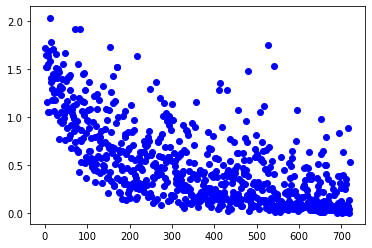

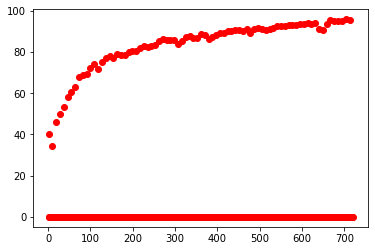

In [25]:
# Plot losses and accuracies
plt.scatter(x, losses, color="b")
plt.show()
plt.scatter(x, acc, color="r")
plt.show()

In [26]:
print(f"Maximum validation accuracy {max(acc)}")
print(f"Minimum train loss {min(losses)}")

Maximum validation accuracy 95.79592418412427
Minimum train loss 0.006868498865514994


In [10]:
# I was unable to upload this model to Github since it takes 167 MB of storage space and Git does not allow 
# that big of a file to be commited. If you notify me I can send a google drive link

model_path = "../Models/resnet4_epoch79_acc97.pth"
loaded_model = ResnetTrained(train_resnet = True, pretrained=False)
loaded_model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [11]:
loaded_model.to(device)
loaded_model.eval()

ResnetTrained(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
     

In [15]:
import time
val_accuracies = list()
averages = list()
iterations = 5
for i in range(iterations):
    tic = time.time()
    accuracy = predict_over_set(test_loader, loaded_model, device)
    val_accuracies.append(accuracy)
    toc = time.time()
    diff = toc -tic
    average = diff/test_samples
    averages.append(average)
    
    print(f"Time passed {diff}, average prediction time {average} seconds for {i} th iteration")
    print(f"Accuracy = {accuracy}")
    
mean = sum(val_accuracies)/len(val_accuracies)
print(f"Average validation accuracy over {iterations} iterations = {mean}")
time_mean = sum(averages)/len(averages)
print(f"Average fps over each prediction in 8 batch is {1/time_mean}")

Time passed 48.526565074920654, average prediction time 0.0034577857399829453 seconds for 0 th iteration
Accuracy = 97.0428958244264
Time passed 49.21925592422485, average prediction time 0.0035071437882446097 seconds for 1 th iteration
Accuracy = 97.0428958244264
Time passed 48.335373640060425, average prediction time 0.003444162294432124 seconds for 2 th iteration
Accuracy = 97.0428958244264
Time passed 49.26000785827637, average prediction time 0.0035100475885903068 seconds for 3 th iteration
Accuracy = 97.0428958244264
Time passed 48.63974380493164, average prediction time 0.003465850349503466 seconds for 4 th iteration
Accuracy = 97.0428958244264
Average validation accuracy over 5 iterations = 97.0428958244264
Average fps over each prediction in 8 batch is 287.6044259334268
